<h1><center><b>Gender Prediction using Machine Learning</b></center></h1>

## Import Important Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

## Import Dataset

In [2]:
df = pd.read_csv('gender_height_weight_foot.csv')
df.head()

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,Male,NaN,241.893563,10.0
1,Male,68.781904,162.310473,12.0
2,Male,74.110105,212.740856,10.0
3,Male,71.730978,220.042470,11.0
4,Male,69.881796,206.349801,10.0


In [3]:
df.shape

(10000, 4)

In [4]:
df.describe()

,height(in feet),weight(in lbs),foot size(in inches)
count,9930.000000,9916.000000,9305.000000
mean,66.379861,161.644172,9.160559
std,3.850525,32.095392,1.871407
min,54.263133,64.700127,6.000000
25%,63.522005,135.954077,7.000000
50%,66.335970,161.647724,10.000000
75%,69.194942,187.348518,11.000000
max,78.998742,269.989698,12.000000


## Deal with Null values

In [5]:
df.isna().sum()  # is null(); is it null or not

Person                    0
height(in feet)          70
weight(in lbs)           84
foot size(in inches)    695
dtype: int64

In [6]:
df.fillna(round(df.mean(),2), inplace=True) # fill null()
df.head(10)

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,Male,66.380000,241.893563,10.00
1,Male,68.781904,162.310473,12.00
2,Male,74.110105,212.740856,10.00
3,Male,71.730978,220.042470,11.00
4,Male,69.881796,206.349801,10.00
5,Male,67.253016,152.212156,9.16
6,Male,68.785081,183.927889,10.00
7,Male,68.348516,167.971111,11.00
8,Male,67.018950,175.929440,10.00
9,Male,63.456494,156.399676,12.00


In [7]:
df.head()

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,Male,66.380000,241.893563,10.0
1,Male,68.781904,162.310473,12.0
2,Male,74.110105,212.740856,10.0
3,Male,71.730978,220.042470,11.0
4,Male,69.881796,206.349801,10.0


In [24]:
df.tail()

,Person,height(in feet),weight(in lbs),foot size(in inches)
9995,Female,66.172652,136.777454,7.0
9996,Female,67.067155,170.867906,9.0
9997,Female,63.867992,128.475319,8.0
9998,Female,69.034243,163.852461,7.0
9999,Female,61.944246,113.649103,9.0


In [8]:
df.isna().sum()

Person                  0
height(in feet)         0
weight(in lbs)          0
foot size(in inches)    0
dtype: int64

## Visualization of Existing Dataset

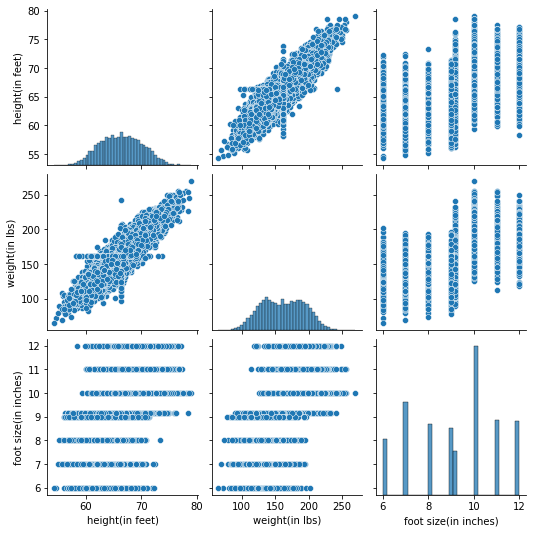

In [9]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'height(in feet)'}>,
        <AxesSubplot:title={'center':'weight(in lbs)'}>],
       [<AxesSubplot:title={'center':'foot size(in inches)'}>,
        <AxesSubplot:>]], dtype=object)

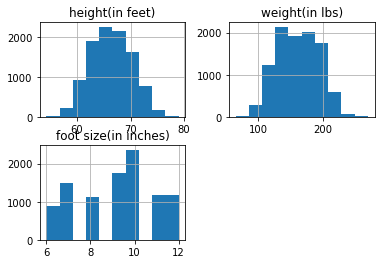

In [10]:
h = df[['Person','height(in feet)','weight(in lbs)','foot size(in inches)']]
h.hist()

## Train - Test - Split

In [11]:
X = df.iloc[:, 1:].values
X

array([[ 66.38      , 241.8935632 ,  10.        ],
       [ 68.78190405, 162.3104725 ,  12.        ],
       [ 74.11010539, 212.7408556 ,  10.        ],
       ...,
       [ 63.86799221, 128.4753188 ,   8.        ],
       [ 69.03424313, 163.8524613 ,   7.        ],
       [ 61.94424588, 113.6491027 ,   9.        ]])

In [12]:
y = df.iloc[:, 0].values
y

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7500, 3) (7500,)
Test set: (2500, 3) (2500,)


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implemented Algorithms for Prediction

### Logistic Regression

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  99.24


In [16]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

      Female       0.99      0.99      0.99      1263
        Male       0.99      0.99      0.99      1237

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

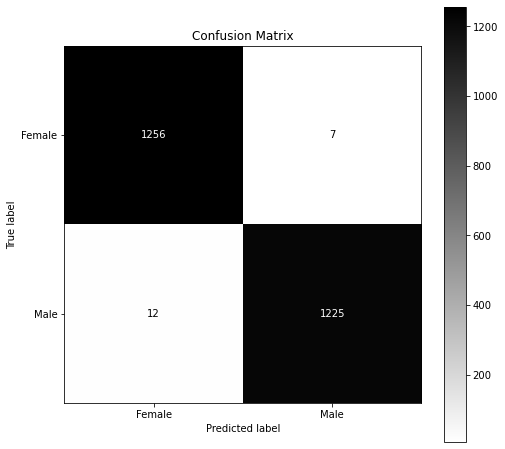

In [17]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_lr, cmap="binary", figsize=(8,8))

In [18]:
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label='Male') * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  98.47


### KNN Classification

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  99.12


from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('Maximum Values for Different Ks Value:\n', mean_acc)
print(max(mean_acc))

In [20]:
class_report = classification_report(y_test, Y_pred_knn)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

      Female       0.99      0.99      0.99      1263
        Male       0.99      0.99      0.99      1237

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

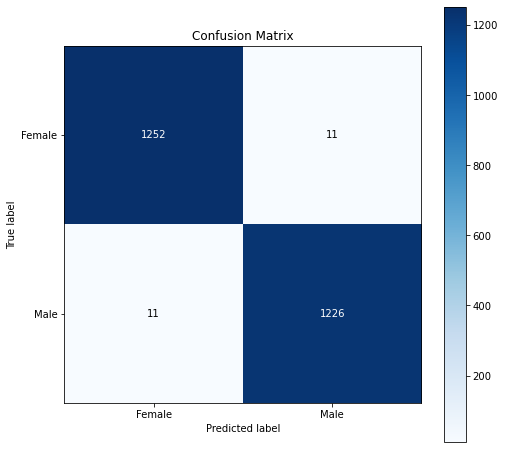

In [21]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_knn, figsize=(8,8))

In [22]:
jac_score_knn = round(jaccard_score(y_test, Y_pred_knn, pos_label='Male') * 100, 2)
print("Jaccard Score: ", jac_score_knn)

Jaccard Score:  98.24


### Overall Output

In [23]:
models = pd.DataFrame({
    'Algorithm Name': ['Logistic Regression', 'KNN'],
    'Accuracy Score (%)': [acc_log, acc_knn],
    'Misclassification (%)': [(abs(acc_log-100)), (abs(acc_knn-100))],
    'Jaccard Score (%)' : [jac_score_logreg, jac_score_knn]
})
models.sort_values(by = 'Accuracy Score (%)', ascending = False)

,Algorithm Name,Accuracy Score (%),Misclassification (%),Jaccard Score (%)
0,Logistic Regression,99.24,0.76,98.47
1,KNN,99.12,0.88,98.24
